Анализ личности клиента — это подробный анализ клиентов компании. Он помогает компании лучше понять своих клиентов и облегчает изменение продукции в соответствии со специфическими потребностями, поведением различных типов клиентов.

Анализ личности клиента помогает компании модифицировать свой продукт в соответствии с целевыми потребителями из различных сегментов потребителей. Например, вместо того, чтобы тратить деньги на маркетинг нового продукта для каждого клиента в базе данных компании, компания может проанализировать, какой сегмент клиентов с наибольшей вероятностью купит продукт, и затем продвигать продукт только для этого сегмента.

Описание столбцов:

|Название| Описание |
|--|--|
|ID| Уникальный идентификатор клиента|
|Year_Birth| Год рождения клиента|
|Education | Уровень образования клиента|
|Marital_Status| Семейное положение клиента|
|Income| Годовой доход семьи клиента|
|Kidhome| Количество детей в семье клиента|
|Teenhome| Количество подростков в домохозяйстве клиента|
|Dt_Customer| Дата регистрации клиента в компании|
|Recency| Количество дней с момента последней покупки клиента|
|Complain| 1, если клиент жаловался в течение последних 2 лет, 0 —  в противном случае|
|MntWines|  Сумма, потраченная на вино за последние 2 года|
|MntFruits| Сумма, потраченная на фрукты за последние 2 года|
|MntMeatProducts| Сумма, потраченная на мясо за последние 2 года|
|MntFishProducts| Сумма, потраченная на рыбу за последние 2 года|
|MntSweetProducts| Сумма, потраченная на сладости за последние 2 года|
|MntGoldProds| Сумма, потраченная на золото за последние 2 года|
|NumDealsPurchases| Количество покупок, совершенных со скидкой|
|AcceptedCmp1| 1, если клиент принял предложение в 1-й кампании, 0 — иначе|
|AcceptedCmp2| 1, если клиент принял предложение во 2-й компании, 0 — иначе|
|AcceptedCmp3| 1, если клиент принял предложение в 3-й кампании, 0 — иначе|
|AcceptedCmp4| 1, если клиент принял предложение в 4-й кампании, 0 — иначе|
|AcceptedCmp5| 1, если клиент принял предложение в 5-й кампании, 0 — иначе|
|Response| 1, если клиент принял предложение в последней кампании, 0 — иначе|
|NumWebPurchases| Количество покупок, совершенных через веб-сайт компании|
|NumCatalogPurchases| Количество покупок, сделанных с помощью каталога|
|NumStorePurchases| Количество покупок, сделанных непосредственно в магазинах|
|NumWebVisitsMonth| Количество посещений веб-сайта компании за последний месяц|

## Загрузка данных

In [167]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np
from datetime import datetime
from scipy import stats

In [168]:
df = pd.read_csv("D:/work_work/tasks/modul_1/project/marketing_campaign.csv", sep='\t')

In [169]:
df.sample(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
1402,2534,1953,Graduation,Married,37716.0,0,1,21-04-2014,4,97,...,7,0,0,0,0,0,0,3,11,0
1219,9739,1963,Graduation,Single,34377.0,0,1,19-01-2013,55,62,...,7,0,0,0,0,0,0,3,11,0
1972,2452,1971,Graduation,Together,34600.0,1,1,01-01-2013,8,199,...,8,0,0,0,0,0,0,3,11,1
1070,10536,1971,PhD,Together,32892.0,1,0,25-05-2014,78,26,...,8,0,0,0,0,0,0,3,11,0
1149,10525,1986,Graduation,Single,26576.0,1,0,13-10-2012,40,10,...,9,1,0,0,0,0,0,3,11,1


In [170]:
column_names=list(df.columns)
lower_column_names=[]
for i in column_names:
    lower_column_names.append(i.lower())
df.columns=lower_column_names

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   2240 non-null   int64  
 1   year_birth           2240 non-null   int64  
 2   education            2240 non-null   object 
 3   marital_status       2240 non-null   object 
 4   income               2216 non-null   float64
 5   kidhome              2240 non-null   int64  
 6   teenhome             2240 non-null   int64  
 7   dt_customer          2240 non-null   object 
 8   recency              2240 non-null   int64  
 9   mntwines             2240 non-null   int64  
 10  mntfruits            2240 non-null   int64  
 11  mntmeatproducts      2240 non-null   int64  
 12  mntfishproducts      2240 non-null   int64  
 13  mntsweetproducts     2240 non-null   int64  
 14  mntgoldprods         2240 non-null   int64  
 15  numdealspurchases    2240 non-null   i

**Вывод**: каждый столбец содержит 2240 ненулевых элементов, столбцов всего 28, из них один имеет тип float, 25 тип int, 3 тип object

## Описательный анализ данных

mnt_all - траты клиента на все типы товаров в сумме за последние 2 года

In [172]:
df['mnt_all']=df['mntwines']+df['mntfruits']+df['mntmeatproducts']+df['mntfishproducts']+df['mntsweetproducts']+df['mntgoldprods']

age - возраст клиента в данный момент времени

In [173]:
df['age']=datetime.now().year-df['year_birth']

Рассмотрите данные — изучите медианы, средние, дисперсии и т.д. 

Что можете сказать о данных? Сделайте вывод.

In [174]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
year_birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
mntwines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
mntfruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
mntmeatproducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
mntfishproducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


**Вывод**:  
  **Возраст клиента**  
    В среднем год рождения клиента - 1969. Значение практически совпадает с медианным - 1970. Минимальный год рождения 1893, что является слишком маленьким значением и может быть выбросом, максимальный год рождения 1996. Средний возраст клиента - 55 лет, медианное значение - 54.
    **Средний доход клиента**  
    Составляет 52247, медианное значение 51382. Минимальное значение дохода клиента - 1730, максимальное - 666666. Дисперсия высокая, значит клиенты имеют сильные различия в уровне дохода.  
    **Количество детей и иждивенцев**  
    Среднее значение - 0.444, медианное значение - 0. Более половины клиентов не имеют детей. Менее 25% клиентов имеют двух детей.
    Аналогичная ситуация с иждивенцами, однако среднее значение несколько выше - 0.506  
    **Количество дней с последней покупки клиента**  
    Среднее количество дней с последней покупки клиента составляет 49.109 и совпадает с медианным значением 49. Минимальное количество дней - 0, максимальное -99. Последний раз совершали покупку более 74 дней назад только 25% клиентов.  
    **Количество средств, потраченных на покупки за последние два года**  
    За последние два года на все покупки клиенты в среднем потратили 605, однако в данных есть выбросы, поскольку медианное значение составляет 396, при этом минимальные траты - 5, максимальные -2525.  
    В среднем затраты клиента на каждый вид продукции составляют  
    -303.935 на вино  
    -26.302 на фрукты  
    -166.95 на мясо  
    -37.525 на рыбу  
    -27.063 на сладости  
    -44.022 на золото  
    Медианные значения значительно отличаются от средних, однако по медиане затраты клиентов на вино, мясо и золото наибольшие.

    
    
  

    

In [175]:
x=df[df['year_birth']==1893].T
x

,239
id,11004
year_birth,1893
education,2n Cycle
marital_status,Single
income,60182.0
kidhome,0
teenhome,1
dt_customer,17-05-2014
recency,23
mntwines,8


Год рождения 1893 является ошибочным значением, поскольку клиент совершил покупку 23 дня назад.

## Предобработка данных

### Дубликаты

Предобработайте датасет — проверьте на наличие дубликатов и удалите, если они есть.

Датасет не содержит дубликатов

In [176]:
df.duplicated().sum()

np.int64(0)

### Отсутствующие значения

Предобработайте датасет — проверьте на наличие NaN и удалите или заполните значения.

В датасете столбец income содержит 24 нулевых значения. Заполним их медианным значением и сделаем повторную проверку.

In [177]:
df.isna().sum()

id                      0
year_birth              0
education               0
marital_status          0
income                 24
kidhome                 0
teenhome                0
dt_customer             0
recency                 0
mntwines                0
mntfruits               0
mntmeatproducts         0
mntfishproducts         0
mntsweetproducts        0
mntgoldprods            0
numdealspurchases       0
numwebpurchases         0
numcatalogpurchases     0
numstorepurchases       0
numwebvisitsmonth       0
acceptedcmp3            0
acceptedcmp4            0
acceptedcmp5            0
acceptedcmp1            0
acceptedcmp2            0
complain                0
z_costcontact           0
z_revenue               0
response                0
mnt_all                 0
age                     0
dtype: int64

Заполнение пропущенных значений медианными

In [178]:
df['income']=df['income'].fillna(df.income.median())

In [179]:
df.isna().sum()

id                     0
year_birth             0
education              0
marital_status         0
income                 0
kidhome                0
teenhome               0
dt_customer            0
recency                0
mntwines               0
mntfruits              0
mntmeatproducts        0
mntfishproducts        0
mntsweetproducts       0
mntgoldprods           0
numdealspurchases      0
numwebpurchases        0
numcatalogpurchases    0
numstorepurchases      0
numwebvisitsmonth      0
acceptedcmp3           0
acceptedcmp4           0
acceptedcmp5           0
acceptedcmp1           0
acceptedcmp2           0
complain               0
z_costcontact          0
z_revenue              0
response               0
mnt_all                0
age                    0
dtype: int64

### Изменение типа данных

Рассмотрев все данные, замените типы на нужные (при необходимости):

- Если есть числа — на `int` или `float`
- Если категории — можно оставить `object`

In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   2240 non-null   int64  
 1   year_birth           2240 non-null   int64  
 2   education            2240 non-null   object 
 3   marital_status       2240 non-null   object 
 4   income               2240 non-null   float64
 5   kidhome              2240 non-null   int64  
 6   teenhome             2240 non-null   int64  
 7   dt_customer          2240 non-null   object 
 8   recency              2240 non-null   int64  
 9   mntwines             2240 non-null   int64  
 10  mntfruits            2240 non-null   int64  
 11  mntmeatproducts      2240 non-null   int64  
 12  mntfishproducts      2240 non-null   int64  
 13  mntsweetproducts     2240 non-null   int64  
 14  mntgoldprods         2240 non-null   int64  
 15  numdealspurchases    2240 non-null   i

In [181]:
df.sample(5)

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,...,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,z_costcontact,z_revenue,response,mnt_all,age
299,3924,1965,PhD,Divorced,57912.0,0,1,17-03-2014,34,801,...,1,0,0,0,0,3,11,0,916,59
1273,635,1966,Master,Married,57183.0,1,1,19-03-2013,51,464,...,0,0,0,0,0,3,11,0,610,58
604,1177,1966,Master,Together,49618.0,1,1,26-01-2013,77,80,...,0,0,0,0,0,3,11,0,129,58
2233,9432,1977,Graduation,Together,666666.0,1,0,02-06-2013,23,9,...,0,0,0,0,0,3,11,0,62,47
1014,5313,1971,Master,Married,38196.0,1,1,18-04-2014,20,30,...,0,0,0,0,0,3,11,0,44,53


In [182]:
df.columns

Index(['id', 'year_birth', 'education', 'marital_status', 'income', 'kidhome',
       'teenhome', 'dt_customer', 'recency', 'mntwines', 'mntfruits',
       'mntmeatproducts', 'mntfishproducts', 'mntsweetproducts',
       'mntgoldprods', 'numdealspurchases', 'numwebpurchases',
       'numcatalogpurchases', 'numstorepurchases', 'numwebvisitsmonth',
       'acceptedcmp3', 'acceptedcmp4', 'acceptedcmp5', 'acceptedcmp1',
       'acceptedcmp2', 'complain', 'z_costcontact', 'z_revenue', 'response',
       'mnt_all', 'age'],
      dtype='object')

**Вывод:** Все числовые признаки записаны с типами данных int и float, нет необходимости менять тип данных

<Axes: xlabel='age'>

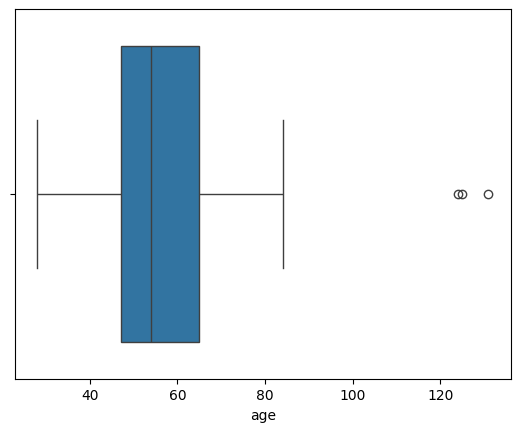

In [183]:
sns.boxplot(data=df.age, orient='h')

Признак возраста содержит некоторое количество выбросов данных - возраст более 120 лет

## Визуализация

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'year_birth'}>,
        <Axes: title={'center': 'income'}>,
        <Axes: title={'center': 'kidhome'}>,
        <Axes: title={'center': 'teenhome'}>],
       [<Axes: title={'center': 'recency'}>,
        <Axes: title={'center': 'mntwines'}>,
        <Axes: title={'center': 'mntfruits'}>,
        <Axes: title={'center': 'mntmeatproducts'}>,
        <Axes: title={'center': 'mntfishproducts'}>],
       [<Axes: title={'center': 'mntsweetproducts'}>,
        <Axes: title={'center': 'mntgoldprods'}>,
        <Axes: title={'center': 'numdealspurchases'}>,
        <Axes: title={'center': 'numwebpurchases'}>,
        <Axes: title={'center': 'numcatalogpurchases'}>],
       [<Axes: title={'center': 'numstorepurchases'}>,
        <Axes: title={'center': 'numwebvisitsmonth'}>,
        <Axes: title={'center': 'acceptedcmp3'}>,
        <Axes: title={'center': 'acceptedcmp4'}>,
        <Axes: title={'center': 'acceptedcmp5'}>],


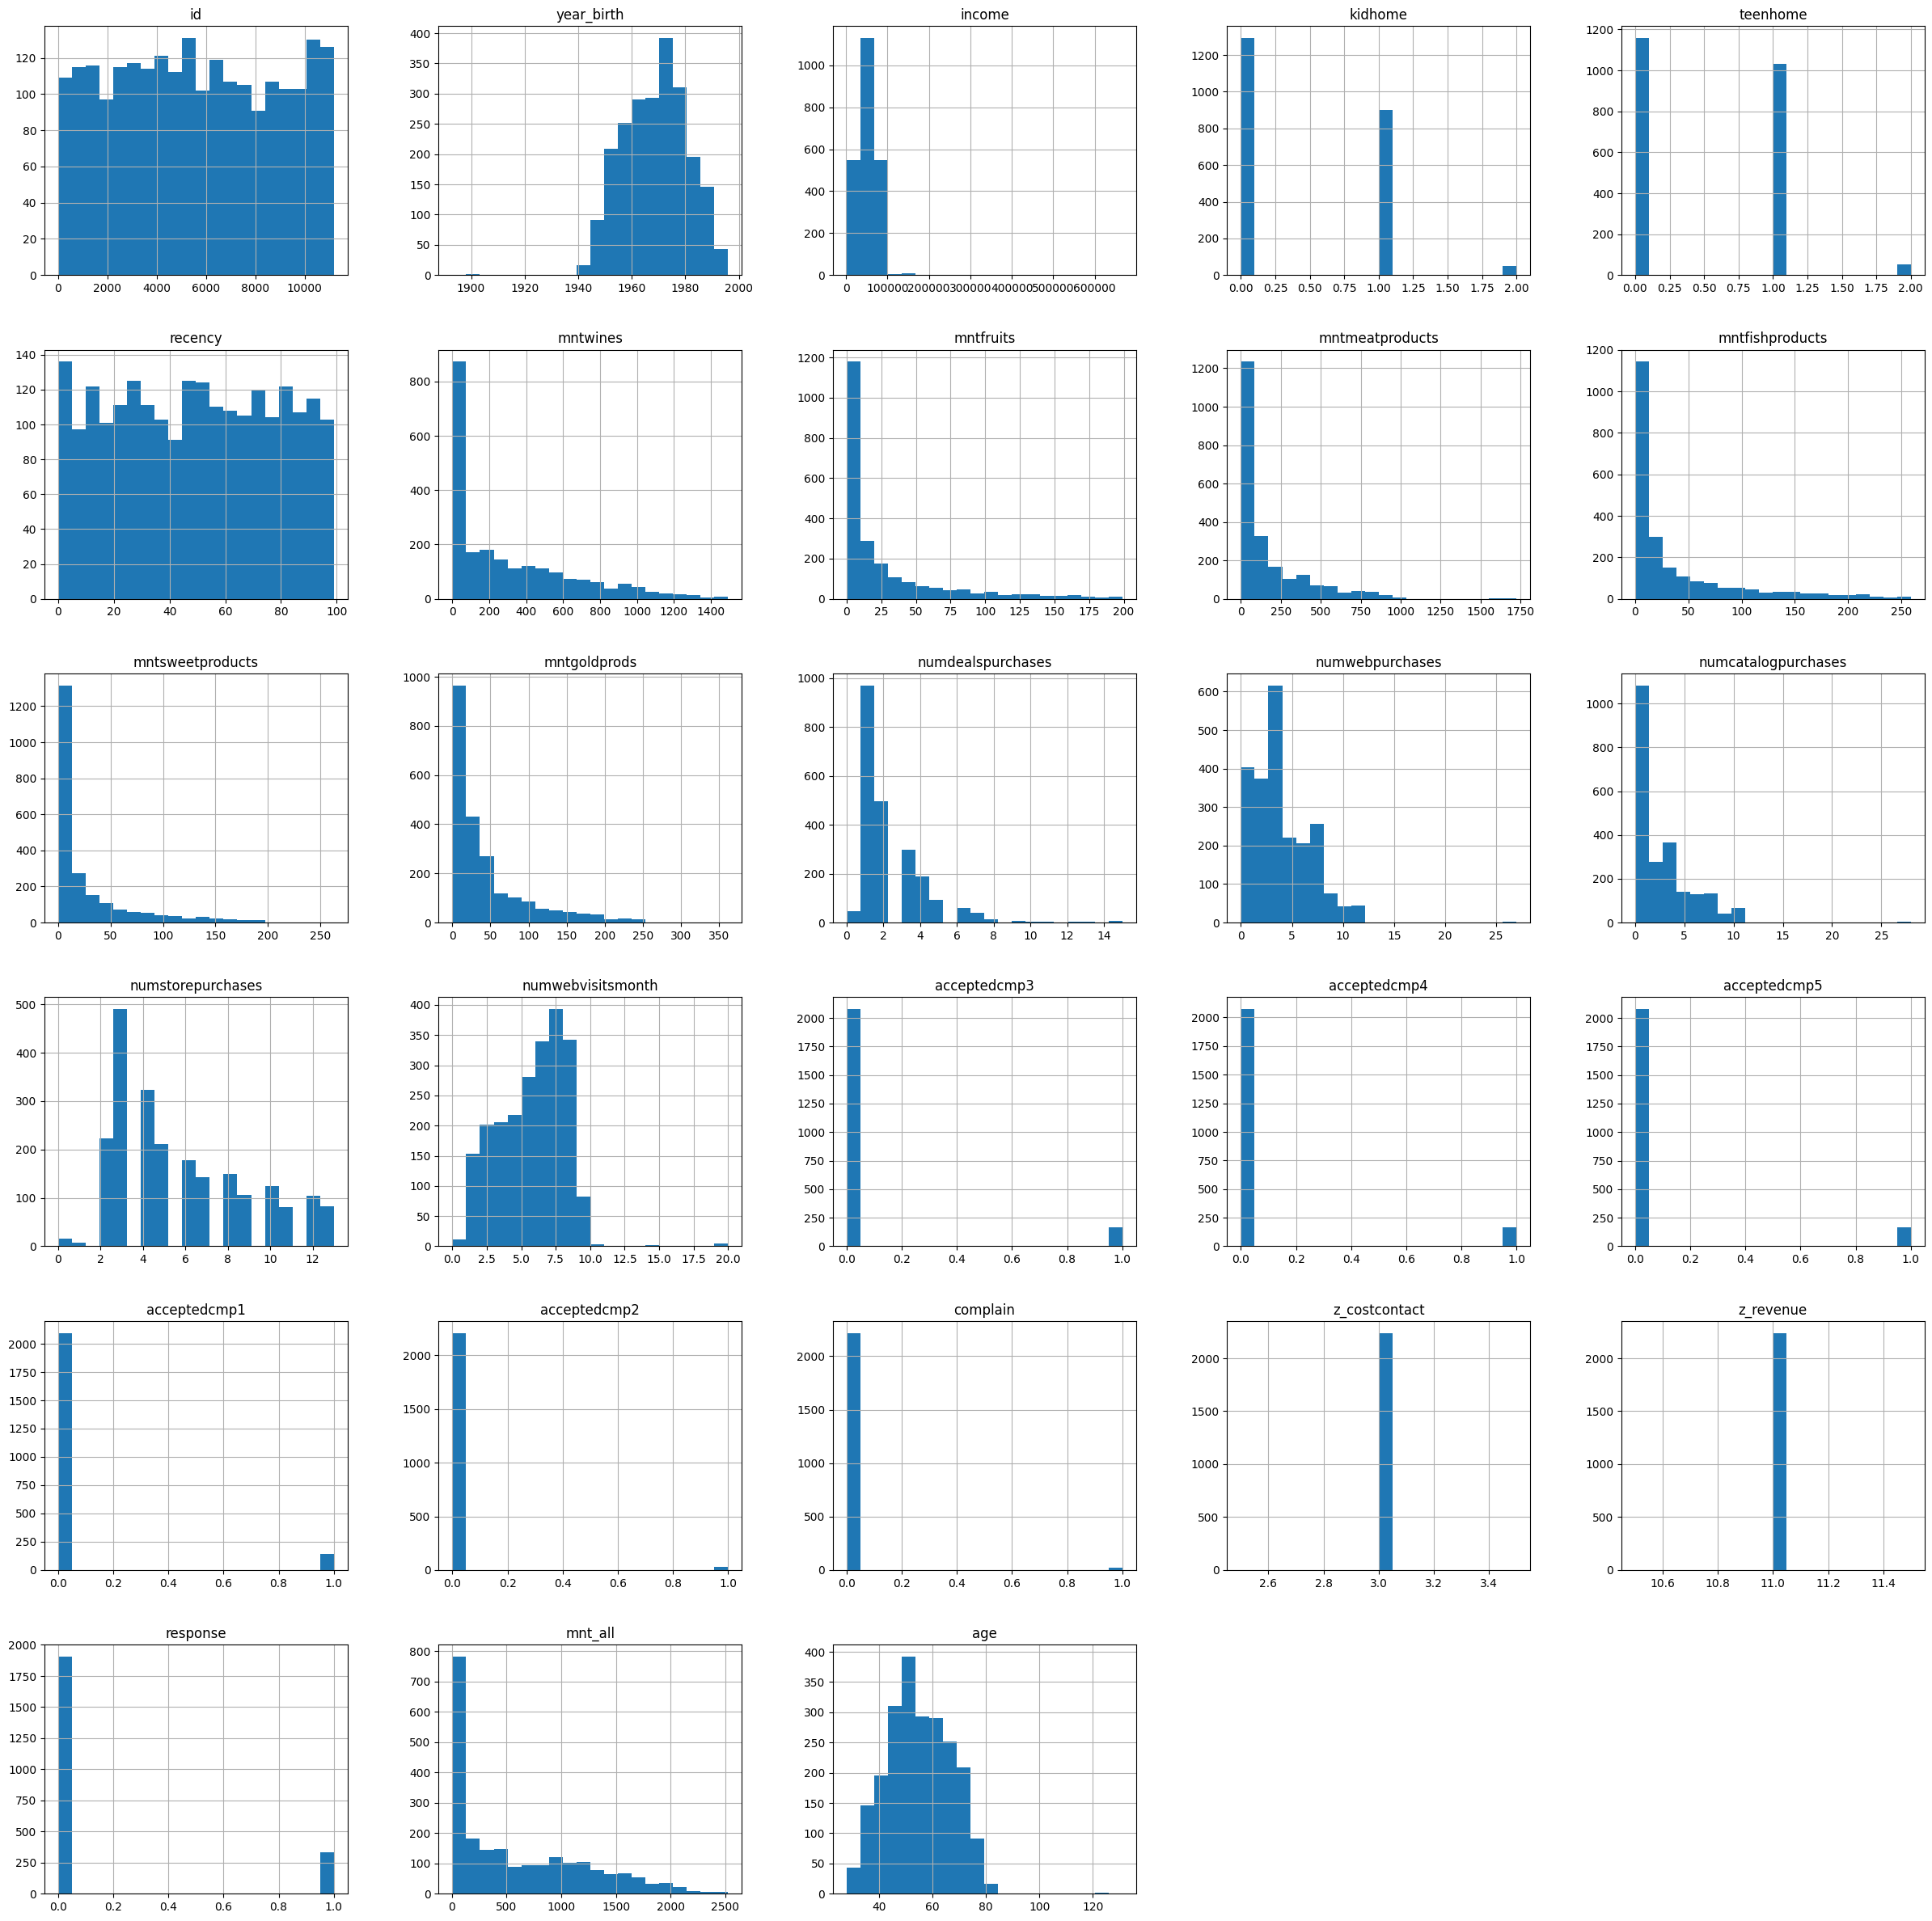

In [184]:
df.hist(figsize=(30,30), bins=20)

Нормально распределены признаки возраста и года рождения, а также количество посещений за последний месяц

df_count - датасет только из числовых признаков

In [185]:
df_count=df.select_dtypes(['int', 'float'])
df_count

,id,year_birth,income,kidhome,teenhome,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,...,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,z_costcontact,z_revenue,response,mnt_all,age
0,5524,1957,58138.0,0,0,58,635,88,546,172,...,0,0,0,0,0,3,11,1,1617,67
1,2174,1954,46344.0,1,1,38,11,1,6,2,...,0,0,0,0,0,3,11,0,27,70
2,4141,1965,71613.0,0,0,26,426,49,127,111,...,0,0,0,0,0,3,11,0,776,59
3,6182,1984,26646.0,1,0,26,11,4,20,10,...,0,0,0,0,0,3,11,0,53,40
4,5324,1981,58293.0,1,0,94,173,43,118,46,...,0,0,0,0,0,3,11,0,422,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,61223.0,0,1,46,709,43,182,42,...,0,0,0,0,0,3,11,0,1341,57
2236,4001,1946,64014.0,2,1,56,406,0,30,0,...,0,0,1,0,0,3,11,0,444,78
2237,7270,1981,56981.0,0,0,91,908,48,217,32,...,1,0,0,0,0,3,11,0,1241,43
2238,8235,1956,69245.0,0,1,8,428,30,214,80,...,0,0,0,0,0,3,11,0,843,68


In [186]:
#датафрейм зависимости среднего значения трат во всех категориях от возраста
mean_age=df_count.groupby(by='age', as_index=False).agg('mean')
#выбор необходимых колонок и создание датафрейма
mean=mean_age.iloc[:, 7:13]
age=mean_age['age']
mnt_all=mean_age['mnt_all']
frames = [mean, age, mnt_all]
mnt_age=pd.concat(frames, axis=1)[0:56]

Отображение трат в зависимости от возраста в виде линейного графика.

<Axes: title={'center': 'Траты в зависимости от возраста'}, xlabel='Возраст', ylabel='Траты'>

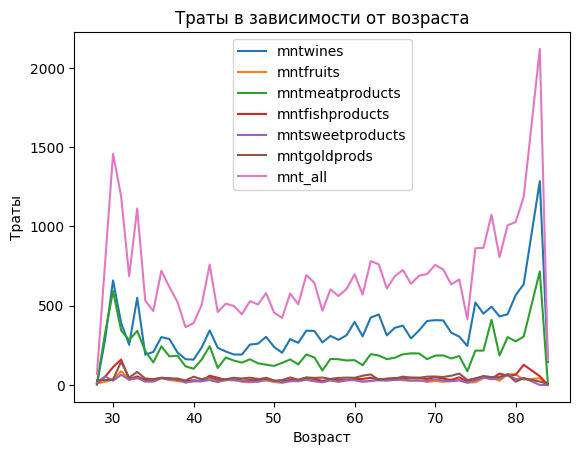

In [187]:
mnt_age.plot(x='age', xlabel='Возраст', ylabel='Траты', title='Траты в зависимости от возраста' )

Из графика видно, что больше всего тратят люди старше 80 лет и имеющие возраст около 30. Люди всех возрастов больше всего тратят на вино и мясо, явный спад трат отображается в возрасте 74-76 лет. Люди в возарсте ~30 лет больше остальных тратят на золото. 

Траты в семье в зависимости от количества детей и иждивенцев

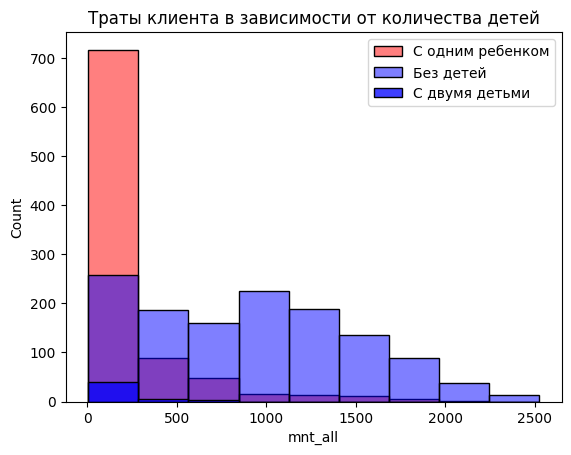

In [188]:
plt.title('Траты клиента в зависимости от количества детей')
bins=np.linspace(df.mnt_all.min(), df.mnt_all.max(), 10)
sns.histplot(df[df.kidhome==1].mnt_all, bins=bins,  color='Red', alpha=0.5, label='С одним ребенком')
sns.histplot(df[df.kidhome==0].mnt_all, bins=bins, color='Blue',alpha=0.5, label='Без детей')
sns.histplot(df[df.kidhome==2].mnt_all, bins=bins, color='Blue',  label='С двумя детьми')
plt.legend()

Наименьшее количество трат в основном приходится на клиентов, у которых есть 1 или 2 ребенка. 

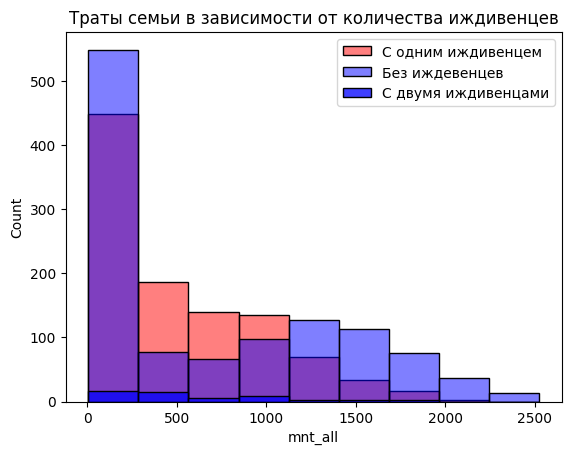

In [189]:
plt.title('Траты семьи в зависимости от количества иждивенцев')
bins=np.linspace(df.mnt_all.min(), df.mnt_all.max(), 10)
sns.histplot(df[df.teenhome==1].mnt_all, bins=bins, color='Red', alpha=0.5, label='С одним иждивенцем')
sns.histplot(df[df.teenhome==0].mnt_all, bins=bins, color='Blue',alpha=0.5, label='Без иждевенцев')
sns.histplot(df[df.teenhome==2].mnt_all, bins=bins, color='Blue',  label='С двумя иждивенцами')
plt.legend()

Клиенты с 2 иждивенцами потратили не более 1000 на покупки за последние 2 года. С одним иждивенцем тратят также не более 1000.

<Axes: title={'center': 'Среднее значение трат семей с разным количеством детей'}, xlabel='kidhome', ylabel='mnt_all'>

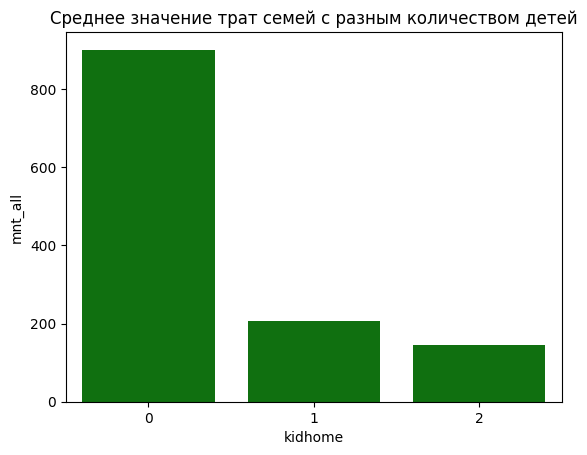

In [190]:
kidhome_mean=df_count.groupby(by='kidhome', as_index=False).agg('mean')[['kidhome', 'mnt_all']]
plt.title('Среднее значение трат семей с разным количеством детей')
sns.barplot(data=kidhome_mean, x='kidhome', y='mnt_all',color='Green')

<Axes: title={'center': 'Среднее значение трат семей с разным количеством иждивенцев'}, xlabel='teenhome', ylabel='mnt_all'>

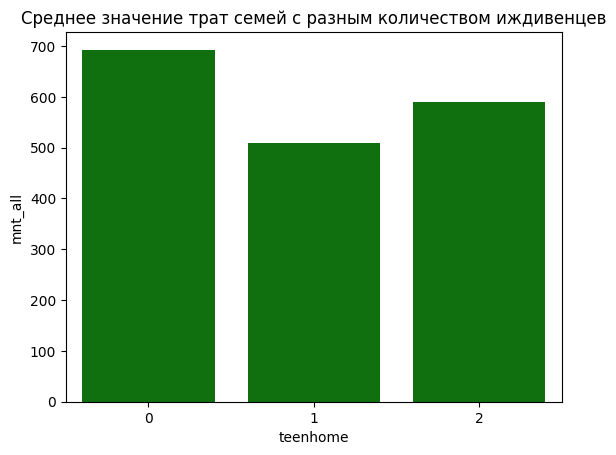

In [191]:
teenhome_mean=df_count.groupby(by='teenhome', as_index=False).agg('mean')[['teenhome', 'mnt_all']]
plt.title('Среднее значение трат семей с разным количеством иждивенцев')
sns.barplot(data=teenhome_mean, x='teenhome', y='mnt_all',color='Green')

Из графиков - клиенты без детей и иждивенцев тратят больше денег. Проверим гипотезу.  
H0 - клиент тратит больше денег, если у него есть дети и иждивенцы  
H1 - клиент не тратит больше денег, если у него нет детей и иждивенцев

In [192]:
df_count['all_in_home']=df['kidhome']+df['teenhome']
df_count['kid_teen_flag']=[ 1 if x>0 else 0 for x in df_count.all_in_home]
df_count.groupby(by='kid_teen_flag', as_index=False).agg('mean')[['kid_teen_flag', 'mnt_all']]

,kid_teen_flag,mnt_all
0,0,1106.029781
1,1,406.579900


Text(0.5, 1.0, 'Сравнение трат клиентов по наличию детей и подростков')

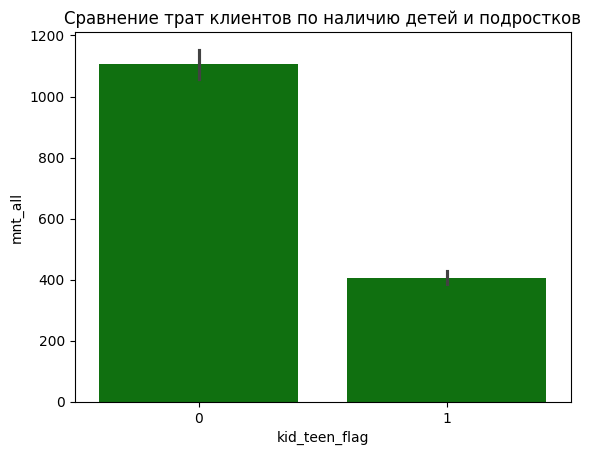

In [193]:
sns.barplot(data=df_count, x='kid_teen_flag', y='mnt_all',color='Green')
plt.title('Сравнение трат клиентов по наличию детей и подростков')

In [194]:
data_yes=df_count[df_count['kid_teen_flag']==1]['mnt_all'].sample(600)
data_no=df_count[df_count['kid_teen_flag']==0]['mnt_all'].sample(600)
alpha=0.05
t_stat, pvalue = stats.ttest_ind(data_yes, data_no)
if pvalue<alpha:
    print(f'Pvalue: {pvalue:.5f} Нулевая гипотеза отвергается')
else:
    print(f'Pvalue: {pvalue:.5f} Подтверждается нулевая гипотеза')

Pvalue: 0.00000 Нулевая гипотеза отвергается


In [195]:
df.columns

Index(['id', 'year_birth', 'education', 'marital_status', 'income', 'kidhome',
       'teenhome', 'dt_customer', 'recency', 'mntwines', 'mntfruits',
       'mntmeatproducts', 'mntfishproducts', 'mntsweetproducts',
       'mntgoldprods', 'numdealspurchases', 'numwebpurchases',
       'numcatalogpurchases', 'numstorepurchases', 'numwebvisitsmonth',
       'acceptedcmp3', 'acceptedcmp4', 'acceptedcmp5', 'acceptedcmp1',
       'acceptedcmp2', 'complain', 'z_costcontact', 'z_revenue', 'response',
       'mnt_all', 'age'],
      dtype='object')

Траты в зависимости от уровня образования

In [196]:
buy_education=df.groupby(by='education', as_index=False)[['mntwines', 'mntfruits',
       'mntmeatproducts', 'mntfishproducts', 'mntsweetproducts',
       'mntgoldprods']].agg('mean')

<Axes: title={'center': 'Траты клиента в зависимости от уровня образования'}, xlabel='Уровень образования', ylabel='Траты'>

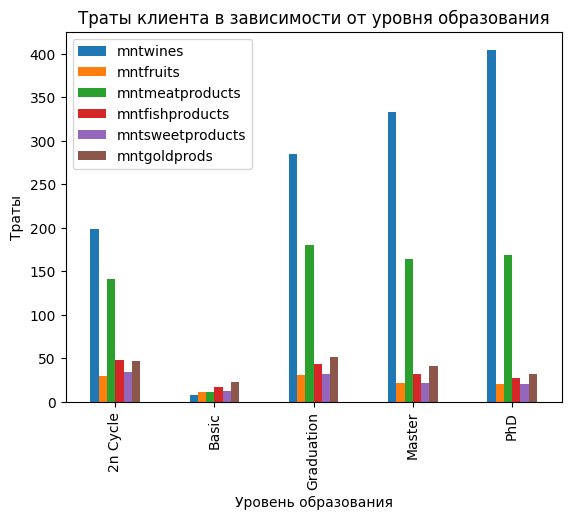

In [197]:
buy_education.set_index('education').plot(kind='bar', ylabel='Траты', xlabel='Уровень образования', title='Траты клиента в зависимости от уровня образования')

Меньше всего тратят клиенты с образованием Basic, больше всего с Master и PhD. Траты по категориям распределены практически одинаково, явно отличаются покупки Basic - они тратят меньше всего денег на вино и больше всего на золото. Остальные клиенты большую часть денег тратят на вино, меньше всего на фрукты и сладкое.

In [226]:
marital_df=df.groupby(by='marital_status', as_index=False)['mntgoldprods'].agg('mean')
marital_df

,marital_status,mntgoldprods
0,Absurd,204.000000
1,Alone,27.000000
2,Divorced,46.288793
3,Married,42.822917
4,Single,43.729167
5,Together,42.994828
6,Widow,56.766234
7,YOLO,42.000000


In [227]:
df.groupby(by='marital_status', as_index=False)[['mntgoldprods', 'mnt_all']].agg('mean')

,marital_status,mntgoldprods,mnt_all
0,Absurd,204.000000,1192.500000
1,Alone,27.000000,256.666667
2,Divorced,46.288793,610.629310
3,Married,42.822917,590.802083
4,Single,43.729167,606.483333
5,Together,42.994828,608.387931
6,Widow,56.766234,738.818182
7,YOLO,42.000000,424.000000


<Axes: title={'center': 'Траты клиента на золото в зависимости от социального статуса'}, xlabel='Социальный статус', ylabel='Траты'>

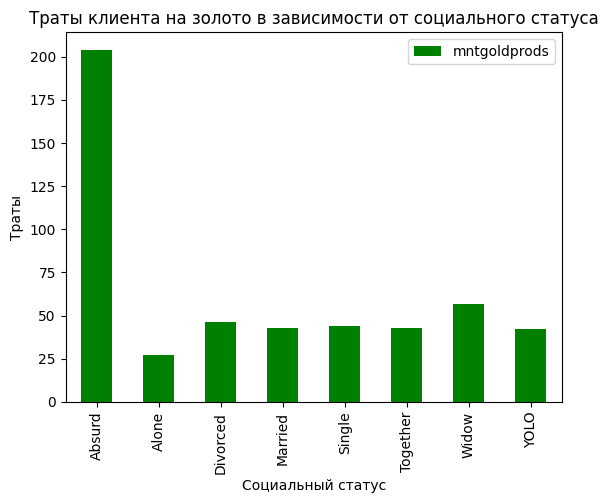

In [228]:
marital_df.set_index('marital_status').plot(kind='bar', color='Green', xlabel='Социальный статус', ylabel='Траты', title='Траты клиента на золото в зависимости от социального статуса')

In [200]:
df['married_or_no']=[1 if x=='Married' else 0 for x in df.marital_status]

In [201]:
marital_df_2=df.groupby(by='married_or_no', as_index=False)['mntgoldprods'].agg('mean')
marital_df_2

,married_or_no,mntgoldprods
0,0,44.774709
1,1,42.822917


<Axes: title={'center': 'Сравнение трат на золото '}, xlabel='Женат ли клиент', ylabel='Траты на золото'>

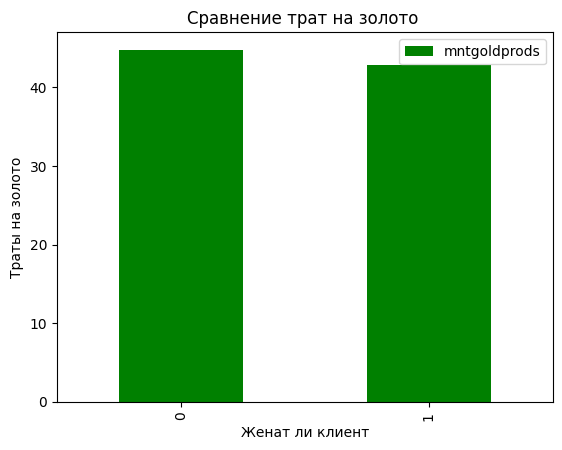

In [202]:
marital_df_2.set_index('married_or_no').plot(kind='bar', color='Green', xlabel='Женат ли клиент', ylabel='Траты на золото', title='Сравнение трат на золото ')

Визуализация 6 вопроса

In [203]:
df.columns

Index(['id', 'year_birth', 'education', 'marital_status', 'income', 'kidhome',
       'teenhome', 'dt_customer', 'recency', 'mntwines', 'mntfruits',
       'mntmeatproducts', 'mntfishproducts', 'mntsweetproducts',
       'mntgoldprods', 'numdealspurchases', 'numwebpurchases',
       'numcatalogpurchases', 'numstorepurchases', 'numwebvisitsmonth',
       'acceptedcmp3', 'acceptedcmp4', 'acceptedcmp5', 'acceptedcmp1',
       'acceptedcmp2', 'complain', 'z_costcontact', 'z_revenue', 'response',
       'mnt_all', 'age', 'married_or_no'],
      dtype='object')

In [204]:
#датафрейм из суммы количества покупок каждым способом и количества товаров, купленных со скидкой
buy_sale=df.groupby(by='numdealspurchases', as_index=False)[['numwebpurchases',
       'numcatalogpurchases', 'numstorepurchases']].agg('sum')
buy_sale

,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases
0,0,276,241,256
1,1,3285,3014,5637
2,2,1902,968,2610
3,3,1331,590,1720
4,4,916,445,1138
5,5,553,244,627
6,6,370,151,407
7,7,247,121,259
8,8,103,38,93
9,9,50,14,65


<Axes: xlabel='Количество товаров, проданных со скидкой'>

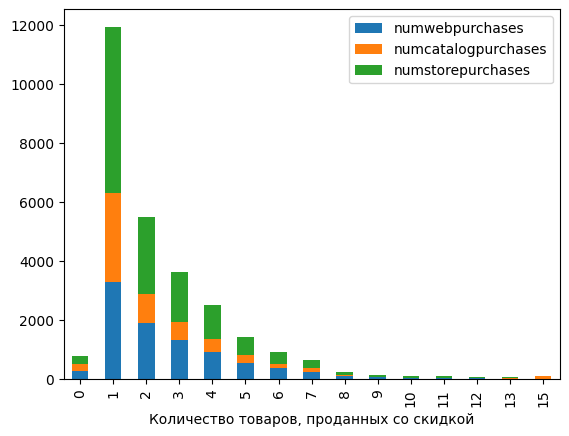

In [205]:
buy_sale.set_index('numdealspurchases').plot(kind='bar', stacked=True, xlabel='Количество товаров, проданных со скидкой')

<Axes: title={'center': 'Продажи со скидкой в зависимости от способа покупки'}, xlabel='Количество товаров, проданных со скидкой'>

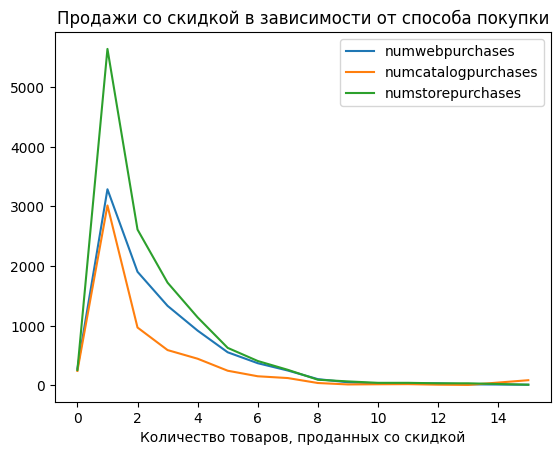

In [206]:
buy_sale.set_index('numdealspurchases').plot(kind='line', xlabel='Количество товаров, проданных со скидкой', title='Продажи со скидкой в зависимости от способа покупки')

Визуализация 7 вопроса

In [207]:
complain_df=df.groupby(by='complain', as_index=False)[['mnt_all','mntwines', 'mntfruits',
       'mntmeatproducts', 'mntfishproducts', 'mntsweetproducts',
       'mntgoldprods' ]].agg('mean')

<Axes: title={'center': 'Траты клиентов в зависимости от поданных жалоб'}, xlabel='Подавал ли клиент жалобу'>

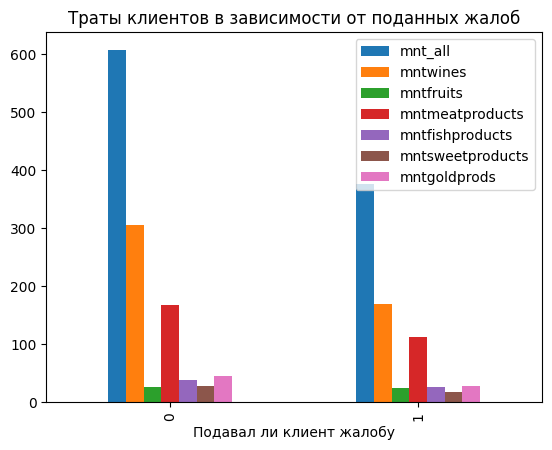

In [208]:
complain_df.set_index('complain').plot(kind='bar', xlabel='Подавал ли клиент жалобу', title='Траты клиентов в зависимости от поданных жалоб')

<Axes: >

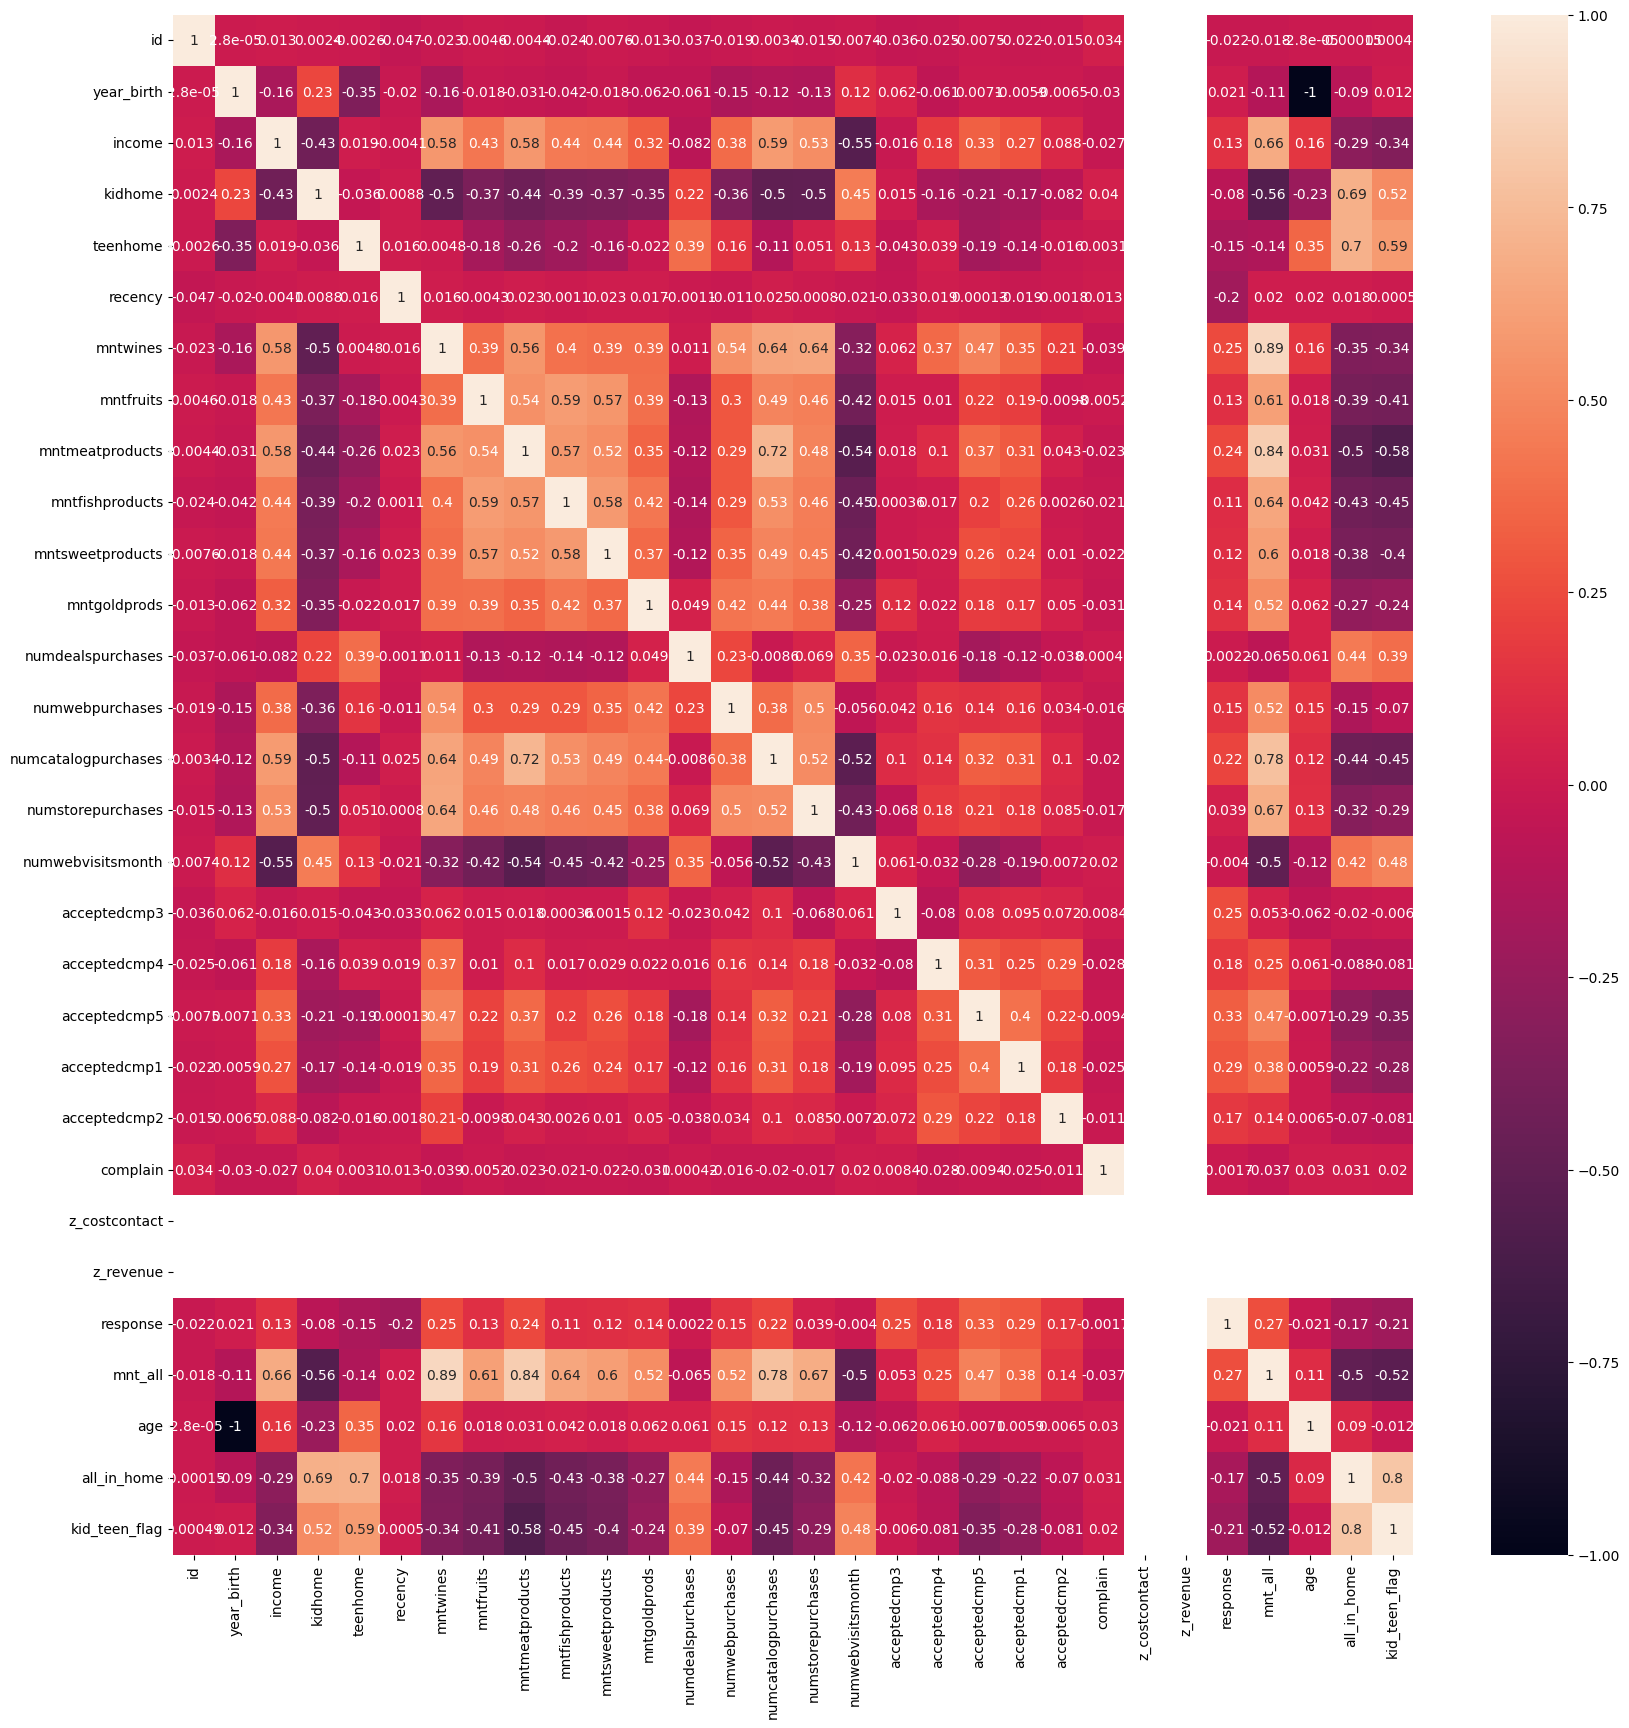

In [218]:
plt.figure(figsize=(20,20))
sns.heatmap(df_count.corr(), annot=True)

Общая сумма трат имеет наибольшую зависимость от общего дохода клиента. А также от количества покупок через сайт/каталог/в магазине

## Задание от заказчика

1. Сколько в среднем клиенты тратят на каждый тип товара? На какой товар надо сделать акцент?
2. Какой средний возраст покупателя? Зависит ли возраст клиента от его покупок во всех категориях?
3. Тратят ли клиент больше денег, если у него много детей и иждивенцев?
4. Зависят ли покупки от образования? Что предпочитают люди чаще покупать в зависимости от образования?
5. Женатые люди тратят больше или меньше денег на покупку золота?
6. Люди, которые покупают товар на сайте чаще берут что-то со скидкой?
7. Зависит ли жалоба клиента от его трат?
8. Люди, принявшие предложение о покупке лишь в последней компании тратят больше, чем люди, принявшие сразу предложение первой компании?

**Вывод:**  
1.  В среднем затраты клиента на каждый тип товара составляют:  
    -303.935 на вино  
    -26.302 на фрукты  
    -166.95 на мясо  
    -37.525 на рыбу  
    -27.063 на сладости  
    -44.022 на золото  
    Наибольший акцент необходимо сделать на вино, так же спросом пользуются мясо и золото.
2. Средний возраст покупателя - 55 лет. Траты на покупки зависят от возраста, больше всего в среднем тратят покупатели в возрасте ~30 лет и более 80. При этом наибольшие траты у клиентов всех возрастов приходятся на мясо и вино. У клиентов в возрасте ~30 лет спросом также пользуется золото.
3. Клиент тратит меньше денег, если у него есть дети и иждивенцы. Траты клиентов без детей и иждивенцев более чем в 2 раза выыше. При этом, чем больше детей, тем меньше клиент тратит денег, однако клиенты с двумя иждивенцами тратят больше денег, чем с одним.
4. Покупки клиентов зависят от образования. Меньше всего тратят люди с образованием Basic, больше всего с Phd. Траты по категориям распределены практически одинаково, явно отличаются покупки Basic - они тратят меньше всего денег на вино и больше всего на золото. Остальные клиенты большую часть денег тратят на вино, меньше всего на фрукты и сладкое.
5. Женатые люди в среднем тратят меньше денег на золото, чем клиенты с иным социальным статусом. Больше всего денег на золото тратят вдовы и клиенты со статусом Absurd. Меньше всего со статусом Alone.
6. Люди, которе покупают товар на сайте не чаще берут что-то со скидкой. Наибольшая часть покупок со скидкой приходится на покупателей магазинов. Наибольшее количество покупок со скидкой - 15 приходится на продажи через каталог.
7. Люди, которые не подавали жалобу за последние 2 года в среднем тратят в 1.6 раз больше, чем те, кто имел претензии. Таким образом, траты клиентов сильно зависят от жалоб.

# Общий вывод

Больше всего клиенты тратят на мясо и вино, на эти продукты необходимо сделать акцент. Наибольший доход приходит от клиентов, которые не имеют детей и иждивенцев с социальным статусом Absurd и Widow. Также траты напрямую зависят от уровня дохода клиента. Сильный убыток приносят жалобы, люди, имевшие претензии тратят намного меньше, чем те, кто их не имел.